# Screen the depolymerase Protein Units against the depolymerase database 
***

### Get the SWORD2 predictions in the same file :

In [1]:
path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_PPT"
import pandas as pd
import os 

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)
dico_folds = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results = {}
for results in outputs :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["X_Group_Name"].values[0]
        if fold != "jelly-roll" :
            if row["prob"] >= 0.5 :
                depo_results[row["query"].split(".pdb")[0]] = {"Fold" : fold , "Prob" : row["prob"]}
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                depo_results[row["query"].split(".pdb")[0]] = {"Fold" : fold , "Prob" : row["prob"]}
                


In [2]:
len(depo_results)

# Apparently, all the good ppt are already in place. Let's check with minibatch 

1987

In [3]:
path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_minibatch"
import pandas as pd
import os 

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)
dico_folds = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results = {}
for results in outputs :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["X_Group_Name"].values[0]
        if fold != "jelly-roll" :
            if row["prob"] >= 0.5 :
                depo_results[row["query"].split(".pdb")[0]] = {"Fold" : fold , "Prob" : row["prob"]}
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                depo_results[row["query"].split(".pdb")[0]] = {"Fold" : fold , "Prob" : row["prob"]}
                



In [4]:
len(depo_results)

# All the minibatch as well. Let's start the scan !

649

***
# The command : 

In [ ]:
foldseek createdb \
/home/conchae/depolymerase/pdb_depolymerase_domains \
/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db

# Generate index files : 

foldseek createindex \
/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db \ 
/home/conchae/depolymerase/tmp/tmp

# *************************
#!/bin/bash
#BATCH --job-name=create_db
#SBATCH --qos=short 
#SBATCH --ntasks=1 
#SBATCH --cpus-per-task=5
#SBATCH --mem=50gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=create_db%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate HH-suite3

foldseek createdb \
/home/conchae/depolymerase/pdb_depolymerase_domains \
/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db

# Generate index files : 

foldseek createindex \
/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db \ 
/home/conchae/depolymerase/tmp


>The PPT dataset

Full proteins

In [ ]:
from multiprocessing.pool import ThreadPool
import subprocess
import os

path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_pdb = f"{path_project}/output_ppt"
path_prot = f"{path_project}/sword2_DepoSeq_pt2"
path_db = "/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db"
path_tmp = f"{path_project}/tmp/tmp_depo"

def seek_beta_helix(path_in) :
    with open(f"{path_project}/scan_full.ppt.log","a+") as outfile : 
        dir_out = f"{path_project}/seekfold_PPT_full"
        protein_id = path_in.split("/")[-1].split(".pdb")[0]
        path_out = f"{dir_out}/{protein_id}.out"
        output_frmt = f"query,target,pident,alnlen,gapopen,qstart,qend,tstart,tend,bits,prob,alntmscore"
        seek = f"foldseek easy-search {path_in} {path_db} {path_out} {path_tmp} --format-output {output_frmt}"
        seek_process = subprocess.Popen(seek, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        press_out, press_err = seek_process.communicate()
        print (press_out, press_err)
        outfile.write(f"{protein_id}\n")
        

prot_full = ['2601', '3287', '7104', '6022', '2743', '3702', '6065', '3898', '158', '4677', '6972', '5351', '2758', '832', '3867', '5159', '5111', '7033', '4502', '4486', '3536', '4294', '3162', '4023', '598', '5736', '4117', '7084', '2563', '1777', '993', '3379', '6044', '5650', '5579', '2750', '5287', '5450', '3314', '5538', '1840', '764', '5979', '1695', '6826', '6754', '4704', '4013', '7015', '1604', '1182', '4038', '3649', '5857', '4712', '2632', '2892', '3471', '5512', '1287', '5610', '6887', '1812', '530', '3547', '1388', '6012']

paths_full = []
for file in prot_full :
    path = f"{path_pdb}/{file}.pdb"
    paths_full.append(path)


#paths_full = []
#for file in os.listdir(f"{path_prot}") :
#    path = f"{path_pdb}/{file}.pdb"
#    if os.path.isfile(f"{path_project}/seekfold_PPT_full/{file}.out") == False :
#        paths_full.append(path)

for path in paths_full :
    seek_beta_helix(path)

if __name__ == '__main__':
    with ThreadPool(20) as p:
        p.map(seek_beta_helix, paths_full)
    
# ******************************************************************************************
#!/bin/bash
#BATCH --job-name=seek_PPT__
#SBATCH --qos=short 
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=30
#SBATCH --mem=90gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=seek_PPT__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate HH-suite3

#python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/seek_betahelix.full.ppt.py

python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/missing_full.ppt.py




The domains

In [ ]:
from multiprocessing.pool import ThreadPool
import subprocess
import os

path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_pdb = f"{path_project}/sword2_DepoSeq_pt2"
path_db = "/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db"
path_tmp = f"{path_project}/tmp/tmp_mini"

def seek_beta_helix(path_in) :
    with open(f"{path_project}/scan_domains.ppt.log","a+") as outfile : 
        dir_out = f"{path_project}/seekfold_PPT_domains"
        protein_id = path_in.split("/")[-1].split(".pdb")[0]
        path_out = f"{dir_out}/{protein_id}.out"
        output_frmt = f"query,target,pident,alnlen,gapopen,qstart,qend,tstart,tend,bits,prob"
        seek = f"foldseek easy-search {path_in} {path_db} {path_out} {path_tmp} --format-output {output_frmt}"
        seek_process = subprocess.Popen(seek, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        press_out, press_err = seek_process.communicate()
        print (press_out, press_err)
        outfile.write(f"{protein_id}\n")

paths_domain = []
for file in os.listdir(f"{path_pdb}") :
    try : 
        for file_2 in os.listdir(f"{path_pdb}/{file}/{file}_A/Protein_Units") :
            if file_2[-3:] == "pdb" :
                file_2_name = file_2.split(".pdb")[0]
                if os.path.isfile(f"{path_project}/seekfold_PPT_domains/{file_2_name}.out") == False :
                    path = f"{path_pdb}/{file}/{file}_A/Protein_Units/{file_2}"
                    paths_domain.append(path)
    except Exception as e:
        print(file)

if __name__ == '__main__':
    with ThreadPool(30) as p:
        p.map(seek_beta_helix, paths_domain)
    
# ******************************************************************************************
#!/bin/bash
#BATCH --job-name=seek_PPT__
#SBATCH --partition=medium 
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=40
#SBATCH --mem=90gb 
#SBATCH --time=2-00:00:00 
#SBATCH --output=seek_PPT__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate HH-suite3

python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/seek_betahelix.ppt.py

> The minibatch dataset : full proteins

In [ ]:
from multiprocessing.pool import ThreadPool
import subprocess
import os

path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_pdb = f"{path_project}/out_minibatch"
path_prot = f"{path_project}/sword2_Minibatch_pt2"
path_db = "/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db"
path_tmp = f"{path_project}/tmp/tmp_mini"

def seek_beta_helix(path_in) :
    with open(f"{path_project}/scan_full.minibatch.log","a+") as outfile : 
        dir_out = f"{path_project}/seekfold_minibatch_full"
        protein_id = path_in.split("/")[-1].split(".pdb")[0]
        path_out = f"{dir_out}/{protein_id}.out"
        output_frmt = f"query,target,pident,alnlen,gapopen,qstart,qend,tstart,tend,bits,prob,alntmscore"
        seek = f"foldseek easy-search {path_in} {path_db} {path_out} {path_tmp} --format-output {output_frmt}"
        seek_process = subprocess.Popen(seek, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        press_out, press_err = seek_process.communicate()
        print (press_out, press_err)
        outfile.write(f"{protein_id}\n")

        
prot_full = ['1576', '379', '423', '1934', '1906', '1220', '1902', '179', '1755', '2143', '1108', '2113', '253', '1326', '1585', '1081', '1581', '1504', '15', '339', '600', '2061', '337', '2135', '1520', '1901', '1524', '1440', '1192', '1233', '1568', '1693', '2173', '393', '1587', '850', '1281', '77', '1286', '723', '1283']

paths_full = []
for file in prot_full :
    path = f"{path_pdb}/{file}.pdb"
    paths_full.append(path)


for path in paths_full :
    seek_beta_helix(path)

        
paths_full = []
for file in os.listdir(f"{path_prot}") :
    path = f"{path_pdb}/{file}.pdb"
    if os.path.isfile(f"{path_project}/seekfold_minibatch_full/{file}.out") == False :
        paths_full.append(path)
    

if __name__ == '__main__':
    with ThreadPool(30) as p:
        p.map(seek_beta_helix, paths_full)
    
# ******************************************************************************************
#!/bin/bash
#BATCH --job-name=seek_PPT__
#SBATCH --qos=medium 
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=40
#SBATCH --mem=90gb 
#SBATCH --time=2-00:00:00 
#SBATCH --output=seek_PPT__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate HH-suite3

python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/seek_betahelix.full.minibatch.py

python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/missing_full.minibatch.py


The domains

In [ ]:
from multiprocessing.pool import ThreadPool
import subprocess
import os

path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_pdb = f"{path_project}/sword2_Minibatch_pt2"
path_db = "/home/conchae/depolymerase/RefDepo_domains/RefDepo_domains_db"
path_tmp = f"{path_project}/tmp"

def seek_beta_helix(path_in) :
    with open(f"{path_project}/scan_domains.minibatch.log","a+") as outfile : 
        dir_out = f"{path_project}/seekfold_minibatch_domains"
        protein_id = path_in.split("/")[-1].split(".pdb")[0]
        path_out = f"{dir_out}/{protein_id}.out"
        output_frmt = f"query,target,pident,alnlen,gapopen,qstart,qend,tstart,tend,bits,prob"
        seek = f"foldseek easy-search {path_in} {path_db} {path_out} {path_tmp} --format-output {output_frmt}"
        seek_process = subprocess.Popen(seek, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        press_out, press_err = seek_process.communicate()
        print (press_out, press_err)
        outfile.write(f"{protein_id}\n")

    
paths_domain = []
for file in os.listdir(f"{path_pdb}") :
    try : 
        for file_2 in os.listdir(f"{path_pdb}/{file}/{file}_A/Protein_Units") :
            if file_2[-3:] == "pdb" :
                file_2_name = file_2.split(".pdb")[0]
                if os.path.isfile(f"{path_project}/seekfold_minibatch_domains/{file_2_name}.out") == False :
                    path = f"{path_pdb}/{file}/{file}_A/Protein_Units/{file_2}"
                    paths_domain.append(path)
    except Exception as e:
        print(file)

if __name__ == '__main__':
    with ThreadPool(30) as p:
        p.map(sword2_pred, paths_domain)
        
        
# ******************************************************************************************
#!/bin/bash
#BATCH --job-name=seek_PPT__
#SBATCH --qos=medium 
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=40
#SBATCH --mem=100gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=seek_PPT__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate HH-suite3

python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/seek_betahelix.minibatch.py




>Missing SWORD2

In [ ]:
/home/conchae/software/SWORD2/SWORD2.py \
-i 2009.pdb \
-o /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/sword2_Minibatch_pt2/2099 \
-x 10 

***
# Scan the results 

>Getting the proteins of interest :
    

In [ ]:
path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

# ***************************************
# PPT :
dir_out = f"{path_project}/seekfold_PPT_full"
# ***************************************
# Minibatch
dir_out = f"{path_project}/seekfold_minibatch_full"


import pandas as pd
import os 
from tqdm import tqdm

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
path_info = f"/home/conchae/depolymerase/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob","aln_score"]
dico_folds_ppt = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

depo_results = {}
for results in tqdm(outputs) :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["X_Group_Name"].values[0]
        if row["alnlen"] > 200 :
            if row["prob"] >= 0.5 :
                depo_results[row["query"].split(".pdb")[0]] = (fold , row["prob"])
                break
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                depo_results[row["query"].split(".pdb")[0]] = (fold , row["prob"])
                
for fold in dico_folds_ppt : 
    print(f"The {fold} presented {len(dico_folds_ppt[fold])} depolymerases.\n")

> Writing the dico 

In [ ]:
import sys
import os 
import pandas as pd 
from Bio import SeqIO
from tqdm import tqdm
import json


path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

# ********************************************************
# PPT version : 
dir_out_full = f"{path_project}/seekfold_PPT_full"
dir_out = f"{path_project}/seekfold_PPT_domains"
path_swords_out = f"{path_project}/sword2_DepoSeq_pt2"
# *****************************************************
# Minibatch version :
dir_out_full = f"{path_project}/seekfold_minibatch_full"
dir_out = f"{path_project}/seekfold_minibatch_domains"
path_swords_out = f"{path_project}/sword2_Minibatch_pt2"
# *********************************************************

path_info = f"/home/conchae/depolymerase/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob","aln_score"]
dico_folds_77 = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

errors = {'A1l_00058_A_1_129_274.pdb',
 'AF-A0A089GJA0-F1-model_v4.pdb',
 'AF-A0A4V2M274-F1-model_v4.pdb',
 'AF-A0A7W9JCS6-F1-model_v4.pdb','AF-A0A658Y395-F1-model_v4.pdb'}

dico_out = {}
for file in os.listdir(dir_out) :
    protein = file.split("_A")[0]
    if protein not in dico_out : 
        tmp_list = []
        tmp_list.append(f"{dir_out}/{file}")
        dico_out[protein] = tmp_list
    else :
        dico_out[protein].append(f"{dir_out}/{file}")

dico_domain_result = {}
for protein in tqdm(dico_out) :
    the_winner = (0,0,0)
    len_protein = len(list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0])
    # Collecting data for each proteins
    results_full_prot = pd.read_csv(f"{dir_out_full}/{protein}.out" , sep = "\t" , names = header_seekfold).fillna("wtf")
    results_full_prot = results_full_prot[~results_full_prot["target"].isin(errors)]
    for _,row in results_full_prot.iterrows():
        fold = info_df[info_df["ID"] == row["target"]]["X_Group_Name"].values[0]
        if fold != "jelly-roll" :
            #full_score = int(row["bits"])**1.2 / len_protein**0.40
            full_score = int(row["bits"])
            target = row["target"]
            break
    the_full_prot = (full_score , f"len alignemnt : {row['alnlen']}" ,f"Full protein {protein}")
    for path in dico_out[protein] :
        if os.path.getsize(path) > 0 :
            results_df = pd.read_csv(f"{path}", sep = "\t" , names = header_seekfold).fillna("wtf")
            results_df = results_df[results_df["target"] == target]
            if results_df.empty == False :
                aa_end = results_df["query"].values[0].split("_")[-1].split(".pdb")[0]
                aa_start = results_df["query"].values[0].split("_")[-2]
                PU_length = int(aa_end) - int(aa_start)
                #score = int(results_df["bits"].values[0])**1.2 / PU_length**0.40
                score = int(results_df["bits"].values[0]) 
                contender = (score , PU_length ,f"len alignemnt : {results_df['alnlen'].values[0]}",results_df["query"].values[0])
                if contender[0] > the_winner[0] :
                    the_winner = contender
                elif contender[0] == the_winner[0] :
                    if contender[1] < the_winner[1] :
                        the_winner = contender
                else :
                    pass
    if the_full_prot[0] > (the_winner[0] + 25) :
    #if the_full_prot[0] > (the_winner[0] + 25) :
        the_winner = the_full_prot 
    if the_winner[0] > 0 :
        dico_domain_result[protein] = the_winner
    
# ********************************************************
# PPT version : 
with open(f"{path_project}/ppt.domains.fine.json", "w") as outfile:
    json.dump(dico_domain_result, outfile)
    
# *****************************************************
# Minibatch version :
with open(f"{path_project}/minibatch.domains.json", "w") as outfile:
    json.dump(dico_domain_result, outfile)
    
with open(f"{path_project}/minibatch.domains.fine.json", "w") as outfile:
    json.dump(dico_domain_result, outfile)

> Testing

In [ ]:
# Testing : 

#dico_domain_result = {}
full_prot_repeat = []
missing_fold = set()
for protein in tqdm(dico_out) :
    the_winner = (0,0,0)
    # Collecting data for each proteins
    if os.path.isfile (f"{dir_out_full}/{protein}.out") :
        results_full_prot = pd.read_csv(f"{dir_out_full}/{protein}.out" , sep = "\t" , names = header_seekfold).fillna("nothing")
        results_full_prot = results_full_prot[~results_full_prot["target"].isin(errors)]
        #print(results_full_prot)
        for _,row in results_full_prot.iterrows():
            try : 
                fold = info_df[info_df["ID"] == row["target"]]["X_Group_Name"].values[0]
            except IndexError :
                missing_fold.add(row["target"])
                print(row["target"])
    else :
        full_prot_repeat.append(protein)
        

> Dealing with the ambiguous ones :

In [ ]:
import sys
import os 
import pandas as pd 
from Bio import SeqIO
from tqdm import tqdm
import json


path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

# *****************************************************
# PPT version :
dico_ppt = json.load(open(f"{path_project}/ppt.domains.json"))
dico_ppt_fine = json.load(open(f"{path_project}/ppt.domains.fine.json"))

ppt_consensus = {}
to_check = []
for protein in dico_ppt : 
    if (len(dico_ppt[protein]) == len(dico_ppt_fine[protein])) and len(dico_ppt[protein]) == 4 :
        if dico_ppt[protein][3] != dico_ppt_fine[protein][3] :
            to_check.append(("raw",dico_ppt[protein],"fine",dico_ppt_fine[protein]))    
        else :
            ppt_consensus[protein] = dico_ppt_fine[protein][3]
    elif len(dico_ppt[protein]) != len(dico_ppt_fine[protein]) :
        to_check.append(("raw",dico_ppt[protein],"fine",dico_ppt_fine[protein]))
    else :
        ppt_consensus[protein] = "full sequence"
        pass
    
import pprint
pp = pprint.PrettyPrinter(width = 150, compact = True)
pp.pprint(to_check)

# quick check :
to_discard = []
for prot in ppt_consensus :
    if prot not in depo_results :
        to_discard.append(prot)
        print(prot)
        
dico_ppt_clean = {}
for prot in ppt_consensus :
    if prot not in to_discard :
        if ppt_consensus[prot] != "full sequence" : 
            len_domain = int(ppt_consensus[prot].split("_")[-1].split(".")[0]) - int(ppt_consensus[prot].split("_")[-2])
            if len_domain >= 200 :
                dico_ppt_clean[prot] = ppt_consensus[prot]
            else :
                dico_ppt_clean[prot] = "full sequence"
        
        
# PPT version : 
with open(f"{path_project}/ppt.domains.clean_final.json", "w") as outfile:
    json.dump(dico_ppt_clean, outfile)



# *****************************************************
# minibatch version :
dico_mini = json.load(open(f"{path_project}/minibatch.domains.json"))
dico_mini_fine = json.load(open(f"{path_project}/minibatch.domains.fine.json"))
        
minibatch_consensus = {}
to_check = []
for protein in dico_mini : 
    if (len(dico_mini[protein]) == len(dico_mini_fine[protein])) and len(dico_mini[protein]) == 4 :
        if dico_mini[protein][3] != dico_mini_fine[protein][3] :
            to_check.append(("raw",dico_mini[protein],"fine",dico_mini_fine[protein])) 
        else :
            minibatch_consensus[protein] = dico_mini_fine[protein][3]
    elif len(dico_mini[protein]) != len(dico_mini_fine[protein]) :
        to_check.append(("raw",dico_mini[protein],"fine",dico_mini_fine[protein]))
    else :
        minibatch_consensus[protein] = "full sequence"
        pass
    
#import pprint
#pp = pprint.PrettyPrinter(width = 150, compact = True)

pp.pprint(to_check)
to_discard = []
for prot in minibatch_consensus :
    if prot not in depo_results :
        to_discard.append(prot)
        print(prot)
        
dico_mini_clean = {}
for prot in minibatch_consensus :
    if prot not in to_discard :
        if minibatch_consensus[prot] != "full sequence" : 
            len_domain = int(minibatch_consensus[prot].split("_")[-1].split(".")[0]) - int(minibatch_consensus[prot].split("_")[-2])
            if len_domain >= 200 :
                dico_mini_clean[prot] = minibatch_consensus[prot]
            else :
                dico_mini_clean[prot] = "full sequence"
        
        

# *****************************************************
# Minibatch version :
with open(f"{path_project}/minibatch.domains.clean_final.json", "w") as outfile:
    json.dump(dico_mini_clean, outfile)
    

***
## Saving the ambiguous ones :


In [ ]:
import sys
import os 
import pandas as pd 
from Bio import SeqIO
from tqdm import tqdm
import json
from collections import Counter

path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

# *****************************************************
# PPT version :
dico_ppt = json.load(open(f"{path_project}/ppt.domains.json"))
dico_ppt_fine = json.load(open(f"{path_project}/ppt.domains.fine.json"))

ppt_consensus = {}
to_check = []
for protein in dico_ppt : 
    if (len(dico_ppt[protein]) == len(dico_ppt_fine[protein])) and len(dico_ppt[protein]) == 4 :
        if dico_ppt[protein][3] != dico_ppt_fine[protein][3] :
            to_check.append(("raw",dico_ppt[protein],"fine",dico_ppt_fine[protein]))    
        else :
            ppt_consensus[protein] = dico_ppt_fine[protein][3]
    elif len(dico_ppt[protein]) != len(dico_ppt_fine[protein]) :
        to_check.append(("raw",dico_ppt[protein],"fine",dico_ppt_fine[protein]))
    else :
        ppt_consensus[protein] = "full sequence"
        pass
    
import pprint
pp = pprint.PrettyPrinter(width = 150, compact = True)
pp.pprint(to_check)

folds = []
good_guys = []
for _,protein_info in enumerate(to_check) :
    protein = protein_info[1][-1]
    if protein.count("Full") > 0 :
        protein_name = protein.split()[-1]
    else :
        protein_name = protein.split("_")[0]
    try : 
        fold = depo_results[protein_name][0]
        folds.append(fold)
        if fold == "right-handed beta-helix" :
            good_guys.append(protein_name)
    except :
        pass


ppt_to_save = []
for _,protein_info in enumerate(to_check) :
    protein = protein_info[1][-1]
    if protein.count("Full") > 0 :
        protein_name = protein.split()[-1]
    else :
        protein_name = protein.split("_")[0]
    if protein_name in good_guys :
        ppt_to_save.append(protein_info)
    
    
        
with open(f"{path_project}/ppt.domains.to_check.txt" , "w") as outfile :
    for _, tuple_protein in enumerate(ppt_to_save) :
        outfile.write(f"{tuple_protein[1]}\t{tuple_protein[3]}\n")
        

In [ ]:
dico_mini = json.load(open(f"{path_project}/minibatch.domains.json"))
dico_mini_fine = json.load(open(f"{path_project}/minibatch.domains.fine.json"))
        
minibatch_consensus = {}
to_check = []
for protein in dico_mini : 
    if (len(dico_mini[protein]) == len(dico_mini_fine[protein])) and len(dico_mini[protein]) == 4 :
        if dico_mini[protein][3] != dico_mini_fine[protein][3] :
            to_check.append(("raw",dico_mini[protein],"fine",dico_mini_fine[protein])) 
        else :
            minibatch_consensus[protein] = dico_mini_fine[protein][3]
    elif len(dico_mini[protein]) != len(dico_mini_fine[protein]) :
        to_check.append(("raw",dico_mini[protein],"fine",dico_mini_fine[protein]))
    else :
        minibatch_consensus[protein] = "full sequence"
        pass
    
import pprint
pp = pprint.PrettyPrinter(width = 150, compact = True)
pp.pprint(to_check)


folds = []
good_guys = []
for _,protein_info in enumerate(to_check) :
    protein = protein_info[1][-1]
    if protein.count("Full") > 0 :
        protein_name = protein.split()[-1]
    else :
        protein_name = protein.split("_")[0]
    try : 
        fold = depo_results[protein_name][0]
        folds.append(fold)
        if fold == "right-handed beta-helix" :
            good_guys.append(protein_name)
    except :
        pass
    
mini_to_save = []
for _,protein_info in enumerate(to_check) :
    protein = protein_info[1][-1]
    if protein.count("Full") > 0 :
        protein_name = protein.split()[-1]
    else :
        protein_name = protein.split("_")[0]
    if protein_name in good_guys :
        mini_to_save.append(protein_info)
        
        
with open(f"{path_project}/minibatch.domains.to_check.txt" , "w") as outfile :
    for _, tuple_protein in enumerate(mini_to_save) :
        outfile.write(f"{tuple_protein[1]}\t{tuple_protein[3]}\n")

***
## Save with the model :

In [2]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import pandas as pd
import os 
from collections import Counter
from Bio import SeqIO
import torch
import matplotlib.pyplot as plt
import numpy as np

path_work = "/media/concha-eloko/Linux/depolymerase_building"
model_path = f"{path_work}/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForTokenClassification.from_pretrained(model_path)

/home/concha-eloko/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /media/concha-eloko/Linux/depolymerase_building/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/ were not used when initializing EsmForTokenClassification: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight']
- This IS expected if you are initializing EsmForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenc

In [9]:
path_protein = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
from Bio import SeqIO

def model_out(sequence) :
    input_ids = tokenizer.encode(sequence, return_tensors='pt', truncation= True)
    outputs = model(input_ids)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    labels = model.config.id2label
    tokens = []
    for token_id, token_probs in zip(input_ids[0], probs[0]):
        top_label_id = token_probs.argmax().item()
        tokens.append(int(labels[top_label_id].split("_")[1]))
    return tokens

def plot_token(tokens) :
    tokens = np.array(tokens)  # convert your list to numpy array for convenience
    plt.figure(figsize=(10,6))
    for i in range(len(tokens) - 1):
        if tokens[i] == 0:
            color = 'black'
        elif tokens[i] == 1:
            color = 'blue'
        else:
            color = 'red'
        plt.plot([i, i+1], [tokens[i], tokens[i+1]], color=color, marker='o')
    plt.xlabel('Token')
    plt.ylabel('Label')
    plt.title('Label for each token')
    plt.xticks(rotation='vertical')
    plt.yticks(np.arange(2), ['0', '1'])  
    plt.grid(True)
    plt.show()


def make_prediction(protein,database = "ppt") :
    dico_file = {"ppt" : "sword2_DepoSeq_pt2", "minibatch" : "sword2_Minibatch_pt2"}
    path_seq = f"{path_protein}/{dico_file[database]}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta"
    seq = str(list(SeqIO.parse(path_seq, "fasta"))[0].seq)
    tokens = model_out(seq)
    plot_token(tokens)
    
    
def quickie_make_prediction(seq) :
    tokens = model_out(seq)
    plot_token(tokens)

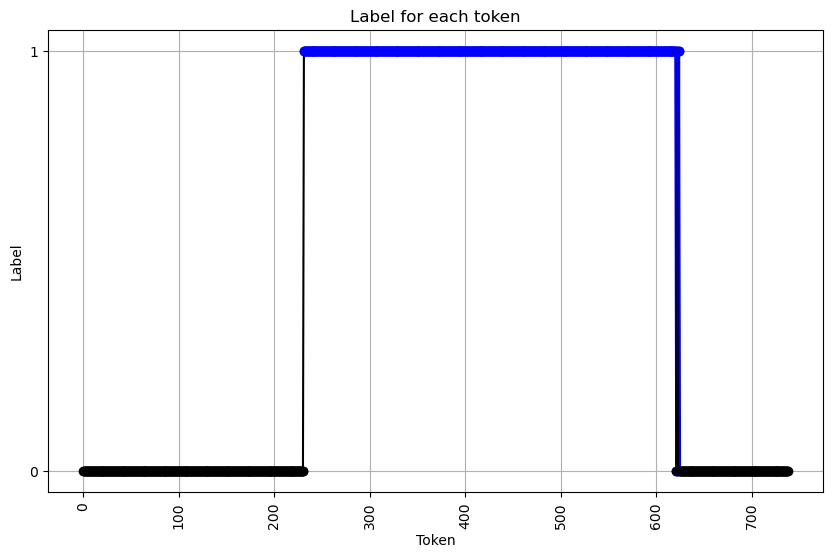

In [18]:
make_prediction("115" , database = "minibatch")

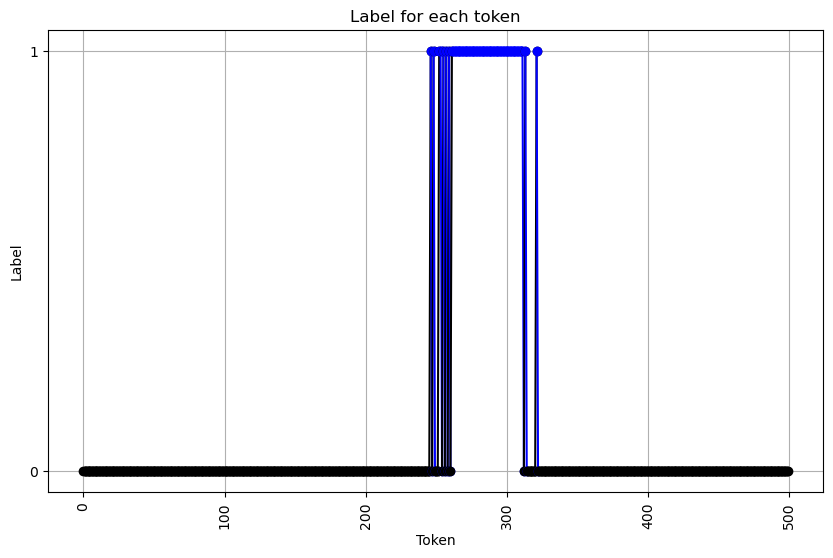

In [17]:
quickie_make_prediction("MAMYEVGTVTGAASQARVTGATTKWSQEALGILPGSILVVYRSGSADLYAIKSVDSDTQLTLTRNITTAFSGASYGIITAETASTSSFANQLASAFAFWRSVVEGWSMALTGSGNITLTDPITGKQVTVPAIAGMAKASDLNALAKLTGGNKLDGSQVITSDNAGFILGKNSDLALLKKQGQGGTIAVGSGTPFRVQRSRATTVSPADTFDDILVIDANNRTTLPGALIAGGDIDNTTKGLLYTQAIELSMNTPYIDFHHNKSANDYTARLITTAADQLSVQGSHLRVDRDLRVGQAADIGSWMQCRYDCVSQQTDFGSPAIGALISGGKVRSRMSGRGGNGDTAGAWGGFYLEEYVGYNHRVVLYMDGFGQKDAWLFYTGGTISTPKGDVMTTGSDVRLKKDFTESQEGASRRINALGVCEFNMKGETRRRRGFIAQQAEKVDPIYTFQSGDVEIDGEKINILNVDHTAIIADLVLTVQELTKQVRDLNKQVQTKEY")

>Write the multifasta for ppt.saved

In [168]:
import ast
import os 
import pandas as pd
from Bio import SeqIO
#path_protein = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
path_protein = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

path_swords_out = f"{path_protein}/sword2_DepoSeq_pt2"
path_ppt_saved = f"{path_protein}/ppt.saved.tsv"

ppt_saved = pd.read_csv(f"{path_ppt_saved}", header = None, sep = "\t").fillna("No")

with open(f"{path_protein}/Dpo_domains.0805.final.extra.tsv","w") as outfile :
    outfile.write(f"Seq_ID\tFold\tProb\tBoundaries\tDpo_seq\tFull_seq\n")
    for _,row in ppt_saved.iterrows() :
        n = 0
        if row[0] == "No" :
            n = 1
        else :
            try :
                list_info = ast.literal_eval(row[n])
                domain = list_info[-1]
                if domain.count("Full protein") > 0 :
                    protein = domain.split()[-1]
                    aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
                    fold = depo_results[protein][0]
                    prob = depo_results[protein][1]
                    outfile.write(f"ppt__{protein}\t{fold}\t{prob}\tfull_protein\t{aa_full}\t{aa_full}\n")
                else :
                    protein = domain.split("_")[0]
                    fold = depo_results[protein][0]
                    prob = depo_results[protein][1]
                    aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
                    dom_aa = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/Protein_Units/{domain.split('.pdb')[0]}.fasta", "fasta"))[0]).seq
                    outfile.write(f"ppt__{protein}\t{fold}\t{prob}\t{domain.split('.pdb')[0]}\t{dom_aa}\t{aa_full}\n")
                    pass
                    #print(domain)
            except Exception as e :
                domain = row[n]
                protein = domain.split("_")[0]
                fold = depo_results[protein][0]
                prob = depo_results[protein][1]
                aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
                dom_aa = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/Protein_Units/{domain.split('.pdb')[0]}.fasta", "fasta"))[0]).seq
                outfile.write(f"ppt__{protein}\t{fold}\t{prob}\t{domain.split('.pdb')[0]}\t{dom_aa}\t{aa_full}\n")
                #print(e,domain, protein)
                
# *****************************************************************************************
# On minibatch
path_swords_out = f"{path_protein}/sword2_Minibatch_pt2"
path_mini_saved = f"{path_protein}/mini.saved.tsv"

mini_saved = pd.read_csv(f"{path_mini_saved}", header = None, sep = "\t").fillna("No")

with open(f"{path_project}/Dpo_domains.0805.final.extra.tsv","a+") as outfile :
    outfile.write(f"Seq_ID\tFold\tProb\tBoundaries\tDpo_seq\tFull_seq\n")
    for _,row in mini_saved.iterrows() :
        n = 0
        if row[0] == "No" :
            n = 1
        else :
            try :
                list_info = ast.literal_eval(row[n])
                domain = list_info[-1]
                if domain.count("Full protein") > 0 :
                    protein = domain.split()[-1]
                    aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
                    fold = depo_results[protein][0]
                    prob = depo_results[protein][1]
                    outfile.write(f"minibatch__{protein}\t{fold}\t{prob}\tfull_protein\t{aa_full}\t{aa_full}\n")
                else :
                    protein = domain.split("_")[0]
                    fold = depo_results[protein][0]
                    prob = depo_results[protein][1]
                    aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
                    dom_aa = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/Protein_Units/{domain.split('.pdb')[0]}.fasta", "fasta"))[0]).seq
                    outfile.write(f"minibatch__{protein}\t{fold}\t{prob}\t{domain.split('.pdb')[0]}\t{dom_aa}\t{aa_full}\n")
                    pass
                    #print(domain)
            except Exception as e :
                domain = row[n]
                protein = domain.split("_")[0]
                fold = depo_results[protein][0]
                prob = depo_results[protein][1]
                aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
                dom_aa = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/Protein_Units/{domain.split('.pdb')[0]}.fasta", "fasta"))[0]).seq
                outfile.write(f"minibatch__{protein}\t{fold}\t{prob}\t{domain.split('.pdb')[0]}\t{dom_aa}\t{aa_full}\n")
                #print(e,domain, protein)
                

2522_A_3_112_444.pdb
Full protein 4899
2311_A_1_1_460.pdb
2474_A_7_323_756.pdb
3498_A_1_54_448.pdb
4705_A_1_1_460.pdb
3071_A_3_126_570.pdb
3512_A_7_240_708.pdb
Full protein 2025
5516_A_4_249_1016.pdb
Full protein 6145
158_A_5_162_572.pdb
2609_A_1_41_424.pdb
3852_A_1_1_412.pdb
6989_A_6_322_757.pdb
Full protein 187
1320_A_3_167_496.pdb
Full protein 1798
5904_A_4_240_589.pdb
Full protein 3592
7103_A_3_172_612.pdb
5578_A_4_162_642.pdb
6766_A_3_356_771.pdb
1173_A_1_91_542.pdb
1797_A_1_1_332.pdb
1435_A_4_172_607.pdb
6884_A_6_321_756.pdb
887_A_3_173_610.pdb
5111_A_7_322_758.pdb
4354_A_3_94_387.pdb
Full protein 541
6051_A_2_118_817.pdb
604_A_5_280_714.pdb
5058_A_3_284_763.pdb
5908_A_3_107_435.pdb
4444_A_3_107_435.pdb
5380_A_1_1_321.pdb
3706_A_8_240_708.pdb
Full protein 6915
5927_A_1_1_464.pdb
5495_A_1_37_658.pdb
768_A_3_107_435.pdb
4699_A_5_290_893.pdb
1492_A_2_36_428.pdb
4815_A_1_1_460.pdb
4254_A_1_1_430.pdb
964_A_1_1_424.pdb
3029_A_3_164_811.pdb
6200_A_2_94_387.pdb
1720_A_3_164_811.pdb
6672_

In [ ]:
df_extra = pd.read_csv(f"{path_project}/Dpo_domains.0805.final.extra.tsv", sep = "\t", header = 0)


with open(f"{path_project}/Dpo_domains.0805.final.extra.multi.fasta","w") as outfile :
    for _,row in df_extra.iterrows() :
        if row["Dpo_seq"].count("_") == 0 :
            outfile.write(f">{row['Seq_ID']}\n{row['Dpo_seq']}\n")

***
# Write the multifasta with the clean domains :

> Fold info :

In [ ]:
path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

# ***************************************
# PPT :
dir_out = f"{path_project}/seekfold_PPT_full"
# ***************************************
# Minibatch
dir_out = f"{path_project}/seekfold_minibatch_full"


import pandas as pd
import os 
from tqdm import tqdm

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
path_info = f"/home/conchae/depolymerase/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob","aln_score"]
dico_folds_ppt = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

depo_results = {}
for results in tqdm(outputs) :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["X_Group_Name"].values[0]
        if row["alnlen"] > 200 :
            if row["prob"] >= 0.5 :
                depo_results[row["query"].split(".pdb")[0]] = (fold , row["prob"])
                break
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                depo_results[row["query"].split(".pdb")[0]] = (fold , row["prob"])

In [ ]:
import sys
import os 
import pandas as pd 
from Bio import SeqIO
from tqdm import tqdm
import json
import pprint
pp = pprint.PrettyPrinter(width = 150, compact = True)


path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

dico_ppt_final = json.load(open(f"{path_project}/ppt.domains.clean_final.json"))
dico_mini_final = json.load(open(f"{path_project}/minibatch.domains.clean_final.json"))


# ********************************************************
# PPT version : 
dir_out_full = f"{path_project}/seekfold_PPT_full"
dir_out = f"{path_project}/seekfold_PPT_domains"
path_swords_out = f"{path_project}/sword2_DepoSeq_pt2"
# *****************************************************
# Minibatch version :
dir_out_full = f"{path_project}/seekfold_minibatch_full"
dir_out = f"{path_project}/seekfold_minibatch_domains"
path_swords_out = f"{path_project}/sword2_Minibatch_pt2"
# *********************************************************

# Write the PPT part :
with open(f"{path_project}/Dpo_domains.0805.final.tsv","w") as outfile :
    outfile.write(f"Seq_ID\tFold\tProb\tBoundaries\tDpo_seq\tFull_seq\n")
    for protein,domain in dico_ppt_final.items() :
        fold = depo_results[protein][0]
        prob = depo_results[protein][1]
        aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
        if domain == "full sequence" :
            outfile.write(f"ppt__{protein}\t{fold}\t{prob}\tfull_protein\t{aa_full}\t{aa_full}\n")
        else :
            dom_aa = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/Protein_Units/{domain.split('.pdb')[0]}.fasta", "fasta"))[0]).seq
            outfile.write(f"ppt__{protein}\t{fold}\t{prob}\t{domain.split('.pdb')[0]}\t{dom_aa}\t{aa_full}\n")

# Write the minibatch part :
with open(f"{path_project}/Dpo_domains.0805.final.tsv","a+") as outfile :
    try : 
        outfile.write(f"Seq_ID\tFold\tProb\tBoundaries\tDpo_seq\tFull_seq\n")
        for protein,domain in dico_mini_final.items() :
            fold = depo_results[protein][0]
            prob = depo_results[protein][1]
            aa_full = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/SWORD/{protein}_A/{protein}_A.fasta", "fasta"))[0]).seq
            if domain == "full sequence" :
                outfile.write(f"minibatch__{protein}\t{fold}\t{prob}\tfull_protein\t{aa_full}\t{aa_full}\n")
            else :
                dom_aa = (list(SeqIO.parse(f"{path_swords_out}/{protein}/{protein}_A/Protein_Units/{domain.split('.pdb')[0]}.fasta", "fasta"))[0]).seq
                outfile.write(f"minibatch__{protein}\t{fold}\t{prob}\t{domain.split('.pdb')[0]}\t{dom_aa}\t{aa_full}\n")
    except Exception as e :
        print(e , protein  ,domain)


> Back to local

In [17]:
import sys
import os 
import pandas as pd 
from Bio import SeqIO
from tqdm import tqdm
import json
import pprint
pp = pprint.PrettyPrinter(width = 150, compact = True)


#path_project = "/media/concha-eloko/Linux/PPT_clean"
path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

Dpo_final = pd.read_csv(f"{path_project}/Dpo_domains.0805.final.tsv", sep = "\t", header = 0)
good_helix = Dpo_final[~((Dpo_final["Fold"] == "right-handed beta-helix") & (Dpo_final["Boundaries"] == "full_protein"))]

In [20]:
Dpo_final

,Seq_ID,Fold,Prob,Boundaries,Dpo_seq,Full_seq
0,ppt__6942,right-handed beta-helix,1.0,6942_A_1_1_466,MVDIYVDALGDFKNMQDGCTEAILKAVAHWGGRTDSAYVQGQKKYG...,MVDIYVDALGDFKNMQDGCTEAILKAVAHWGGRTDSAYVQGQKKYG...
1,ppt__898,right-handed beta-helix,0.795,898_A_5_201_576,DRSIYVNVNWFGADPSGAGWSSDAIYSAFQISNCVEFDGLYKYKGR...,MRFFSRRSIIKGFMPLPFFMFATSSHAERSRTNESPPTVAFNYEKD...
2,ppt__4863,right-handed beta-helix,1.0,4863_A_2_110_517,DFTLEDFGAISNPDVDSTAFIQAAFNSGLKLTSKTDGKYLLKDTIF...,MDFNKRNLIKAFMYTCASLPLTKVYSKPSIPRNEYFFPVDKLIYKA...
3,ppt__5053,right-handed beta-helix,1.0,5053_A_5_252_584,RRYFKVTDYPGGMPNSQVVRNSDGTLTIIKGANNTNAIKSAIADAQ...,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTLDTSESIVT...
4,ppt__499,right-handed beta-helix,1.0,499_A_4_170_653,REFYADAFPGIDPTGQTSSTQGILDAIAQINSQVDSTFNGDITTYP...,MAEVPLPTPTQALVPSTDIRNAVFAGAKLDEEVTGTGEFYTDRLGV...
...,...,...,...,...,...,...
1805,minibatch__723,right-handed beta-helix,1.0,723_A_3_308_953,TFLSFDMFNIKNDASEDVTQAIIDVFNYSNDLGIPVVQKSGRYLIS...,MSQTVITSAFEQLKAQEAANGGVVILDEFVFANIPNLDITSPIDRG...
1806,minibatch__1283,right-handed beta-helix,1.0,1283_A_4_150_502,KFVTPLTKNGVENAEYNYQLVQSLLNKGLHVDLKMGDIYFSQPVQT...,MTNMIESPSWDDEIAIIARNERVSGGQDGVANRPLKTLANRTRYLK...
1807,minibatch__1829,right-handed beta-helix,1.0,1829_A_3_260_821,TWCDMNMYPELDRTGSTNMVSQINAIIESAKEKGFYTVKDTSPPGS...,MTVSTEVDHNDYTGNGVTTSFPYTFRIFKKSDLTVQVADLNENITV...
1808,minibatch__496,right-handed beta-helix,1.0,496_A_5_254_593,RRTNFVMPEDFPGTDTEQLLAANSYAKANSVNFQLQPGKTYVLTGS...,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTLDTSESIVT...


In [35]:
with open(f"{path_project}/Dpo_domains.0805.final.multi.fasta","w") as outfile :
    for _,row in good_helix.iterrows() :
        if row["Dpo_seq"].count("_") == 0 :
            outfile.write(f">{row['Seq_ID']}\n{row['Dpo_seq']}\n")

In [36]:
check_fasta = SeqIO.parse(f"{path_project}/Dpo_domains.0805.final.multi.fasta" , "fasta")

In [41]:
for record in check_fasta :
    if record.seq.count("_") > 0 :
        print(record)

***
# ESM2 predictions on the clean 0805 Dpo domains 

In [ ]:
#!/bin/bash
#BATCH --job-name=ESM_2__
#SBATCH --qos=medium
#SBATCH --ntasks=1 
#SBATCH --cpus-per-task=40 
#SBATCH --mem=80gb 
#SBATCH --time=3-00:00:00 
#SBATCH --output=ESM_2__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate embeddings

python /home/conchae/software/esm/scripts/extract.py \
esm2_t33_650M_UR50D \
/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo_domains.0805.final.multi.fasta \
/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo_domains.0805.final.multi.out \
--repr_layers 33 \
--include mean per_tok


# The extra sequences :
#*****************************************
#!/bin/bash
#BATCH --job-name=ESM_2__
#SBATCH --qos=medium
#SBATCH --ntasks=1 
#SBATCH --cpus-per-task=40 
#SBATCH --mem=80gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=ESM_2__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate embeddings

python /home/conchae/software/esm/scripts/extract.py \
esm2_t33_650M_UR50D \
/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo_domains.0805.final.extra.multi.fasta \
/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo_domains.0805.final.extra.multi.out \
--repr_layers 33 \
--include mean per_tok

> Get the tensors :
    

In [ ]:
import torch
import os 
import pandas as pd
from tqdm import tqdm 


path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_esm = f"{path_project}/Dpo_domains.0805.final.extra.multi.out"

embeddings_esm = {}
for file in tqdm(os.listdir(path_esm)) :
    path_file = f"{path_esm}/{file}"
    index = file.split(".")[0]
    embb = torch.load(f"{path_file}")["mean_representations"][33].tolist()
    embeddings_esm[index] = embb
    
with open(f"{path_project}/Dpo.0805.embeddings.extra.csv" , "w") as outfile :
    for index in tqdm(embeddings_esm) :
        outfile.write(f"{index},")
        for _,  emb in enumerate(embeddings_esm[index]) :
            outfile.write(f"{emb},")
        outfile.write("\n")

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo.0805.embeddings.extra.csv \
/media/concha-eloko/Linux/PPT_clean
    
    

***
# Make the ultimate files

In [ ]:
import os 
import pandas as pd
from tqdm import tqdm 

path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

esm2_depo = pd.read_csv(f"{path_project}/Dpo.0805.embeddings.csv" , header = None, sep = "," , index_col = 0)
esm2_extra = pd.read_csv(f"{path_project}/Dpo.0805.embeddings.extra.csv" , header = None, sep = "," , index_col = 0)
esm2 = pd.concat([esm2_depo, esm2_extra], axis = 0)

esm2 = esm2.drop([1281], axis = 1)
esm2.to_csv(f"{path_project}/Dpo.0805.embeddings.ultimate.csv", sep = ",", header = None, index = True)
# ***************************************************************

df_final = pd.read_csv(f"{path_project}/Dpo_domains.0805.final.tsv" , sep = "\t", header =0)
df_extra = pd.read_csv(f"{path_project}/Dpo_domains.0805.final.extra.tsv" , sep = "\t", header =0)
df_Dpo = pd.concat([df_final, df_extra], axis = 0)

df_Dpo.to_csv(f"{path_project}/Dpo_domains.0805.final.ultimate.tsv", sep = "\t", header = 0, index = True)


In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo.0805.embeddings.ultimate.csv \
/media/concha-eloko/Linux/PPT_clean
    
    
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/Dpo_domains.0805.final.ultimate.tsv \
/media/concha-eloko/Linux/PPT_clean
    
    